In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('BlinkIT Grocery Data.csv')

In [7]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [5]:
df.shape

(8523, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [36]:
num_col = df.select_dtypes(include=[ 'int64', 'float64'])
cat_col = df.select_dtypes(include='object')

In [38]:
num_col.columns

Index(['Outlet Establishment Year', 'Item Visibility', 'Item Weight', 'Sales',
       'Rating', 'Years_Operational'],
      dtype='object')

In [39]:
cat_col.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item_Category'],
      dtype='object')

In [40]:
num_col.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating,Years_Operational
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857,8.549454
std,3.189396,0.051598,4.643456,62.275067,0.605651,3.189396
min,2011.000000,0.000000,4.555000,31.290000,1.000000,3.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000,7.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000,9.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000,11.000000
max,2022.000000,0.328391,21.350000,266.888400,5.000000,14.000000


In [8]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [9]:
df.isnull().sum()


,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [10]:
df.duplicated().sum()


np.int64(0)

In [11]:
df['Item Fat Content'].value_counts()

,count
Item Fat Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [33]:
df['Outlet Type'].value_counts()

,count
Outlet Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [12]:
# Replace variants like 'LF', 'low fat' with 'Low Fat', etc.
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [34]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Years_Operational,Visibility_Bin,Item_Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,13,Very High,FD
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,3,Low,NC
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,9,Low,FD
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,11,Medium,FD
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,10,Medium,DR


In [13]:
df['Years_Operational'] = 2025 - df['Outlet Establishment Year']


In [14]:
df['Visibility_Bin'] = pd.qcut(df['Item Visibility'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [15]:
df['Item_Category'] = df['Item Identifier'].apply(lambda x: x[:2])


In [35]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Years_Operational,Visibility_Bin,Item_Category
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,13,Very High,FD
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,3,Low,NC
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,9,Low,FD
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,11,Medium,FD
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,10,Medium,DR


<Axes: xlabel='Item Fat Content', ylabel='count'>

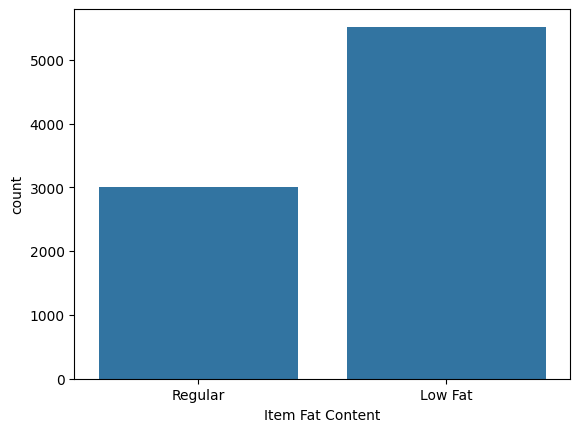

In [19]:
sns.countplot(data=df, x='Item Fat Content')

<Axes: xlabel='Outlet Type', ylabel='count'>

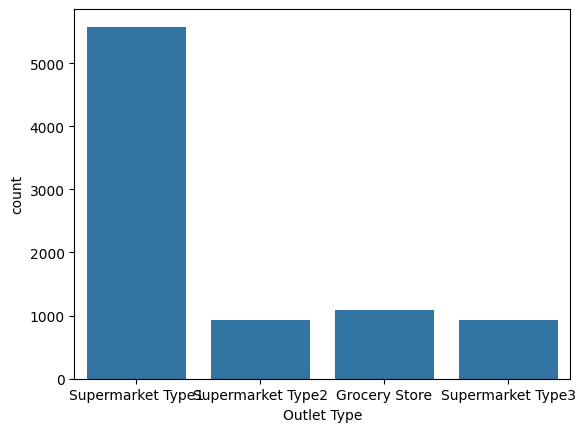

In [20]:
sns.countplot(data=df, x='Outlet Type')


<Axes: xlabel='Item Weight', ylabel='Count'>

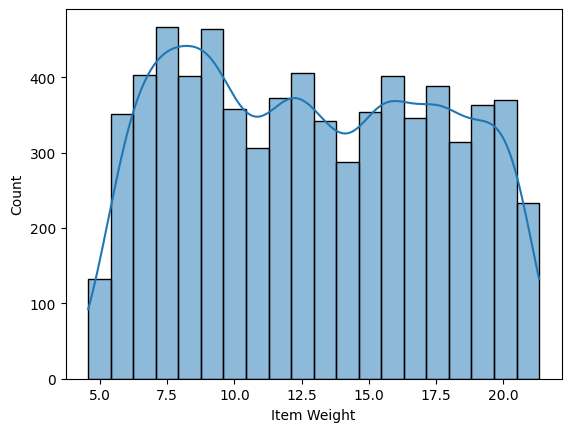

In [21]:
sns.histplot(df['Item Weight'], kde=True)

<Axes: ylabel='Sales'>

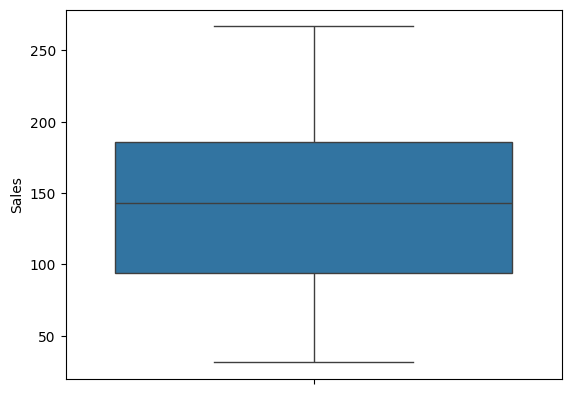

In [22]:
sns.boxplot(data=df, y='Sales')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Fruits and Vegetables'),
  Text(1, 0, 'Health and Hygiene'),
  Text(2, 0, 'Frozen Foods'),
  Text(3, 0, 'Canned'),
  Text(4, 0, 'Soft Drinks'),
  Text(5, 0, 'Household'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Meat'),
  Text(8, 0, 'Breads'),
  Text(9, 0, 'Hard Drinks'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'Dairy'),
  Text(12, 0, 'Breakfast'),
  Text(13, 0, 'Baking Goods'),
  Text(14, 0, 'Seafood'),
  Text(15, 0, 'Starchy Foods')])

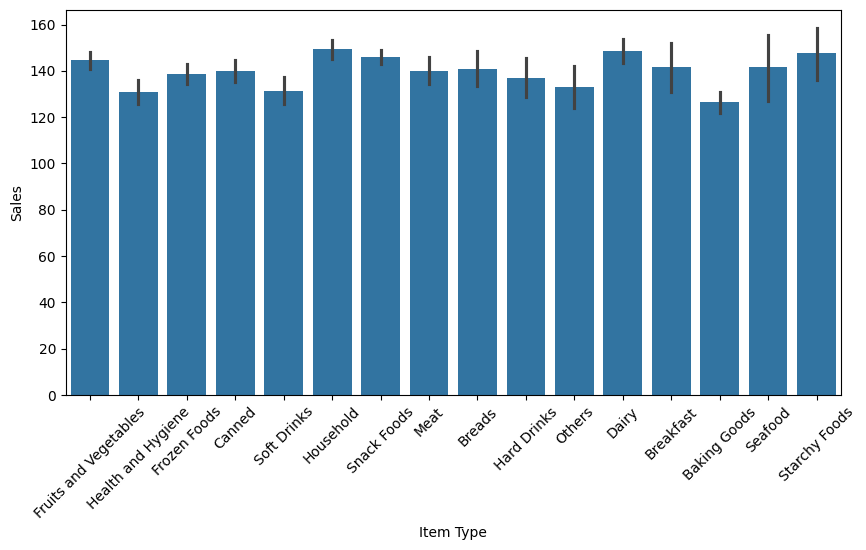

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='Item Type', y='Sales', estimator='mean')
plt.xticks(rotation=45)


<Axes: xlabel='Outlet Type', ylabel='Sales'>

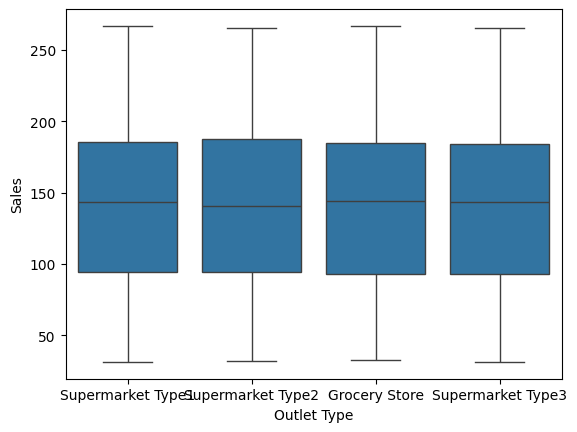

In [24]:
sns.boxplot(data=df, x='Outlet Type', y='Sales')


<Axes: xlabel='Item Visibility', ylabel='Sales'>

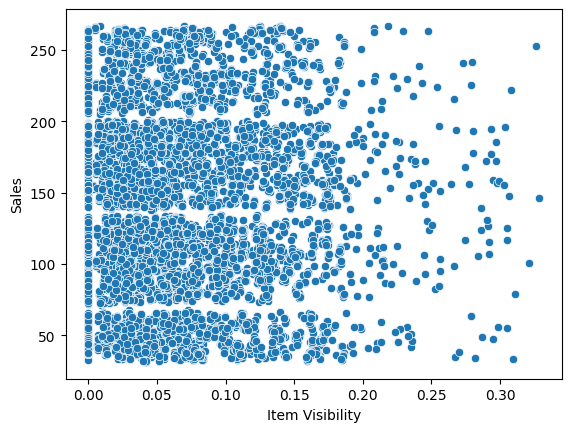

In [25]:
sns.scatterplot(data=df, x='Item Visibility', y='Sales')

<Axes: >

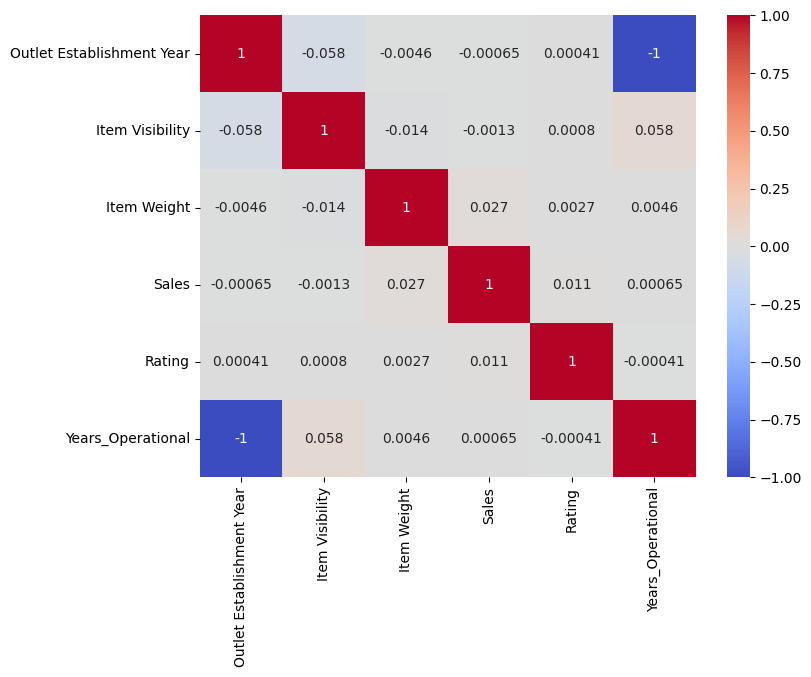

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: ylabel='Sales'>

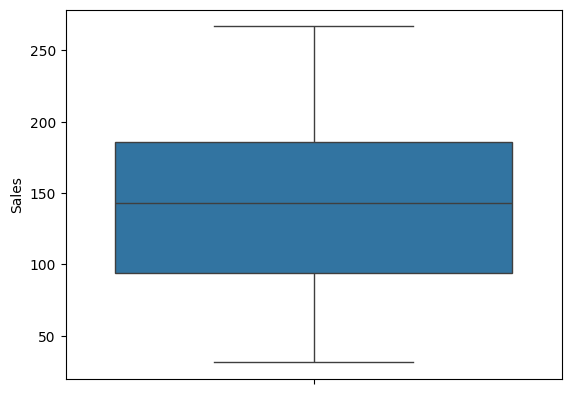

In [27]:
sns.boxplot(data=df, y='Sales')

In [31]:
pd.pivot_table(df, values='Sales', index='Item Type', columns='Outlet Type', aggfunc='mean')

Outlet Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item Type,,,,
Baking Goods,126.438068,125.975262,126.385315,128.809243
Breads,146.452873,140.567553,131.089007,145.676239
Breakfast,147.026989,141.656571,129.384500,147.083909
Canned,138.080808,140.021853,139.134244,140.625689
Dairy,147.166737,149.288209,145.738967,148.037063
Frozen Foods,133.499427,138.720939,144.062146,137.149955
Fruits and Vegetables,140.943517,145.878246,140.498458,145.009904
Hard Drinks,117.189350,135.246597,164.050882,143.576530
Health and Hygiene,133.791394,131.494766,126.550410,127.852417
